In [1]:
# Data Processing
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# Statistical Analysis
from scipy import stats
# Modeling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import warnings 
warnings.filterwarnings("ignore")

# 1. Exploratory Data Analysis (EDA)
From the innitial exploration, we can see that the column `PURCHASES` contains values acquired from the sum of two adjacent columns, namely `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`. This column could therefore be dropped to avoid redundancy. From the correlation heatmap, it can also be seen that `PURCHASES` has high positive correlation with its two engineered feature previously mentioned. Furthermore, we also notice a relatively strong positive correlation between the column `CREDIT LIMIT` and `BALANCE`. It means that the customers with more balance is their account is mostly trusted with more credit limit. 

After calculating the outlier by the manual-made-function, it can be seen that our dataset has a high degree of variability as outliers are found in almost all columns. In this case, the outliers exceeds 10 percent from the total data in 5 out of 17 numerical columns. 

In terms of missing values, we found them in two columns in our dataset, namely `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`. We need therefore preprocess the data by filling the missing value in the next section. 

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


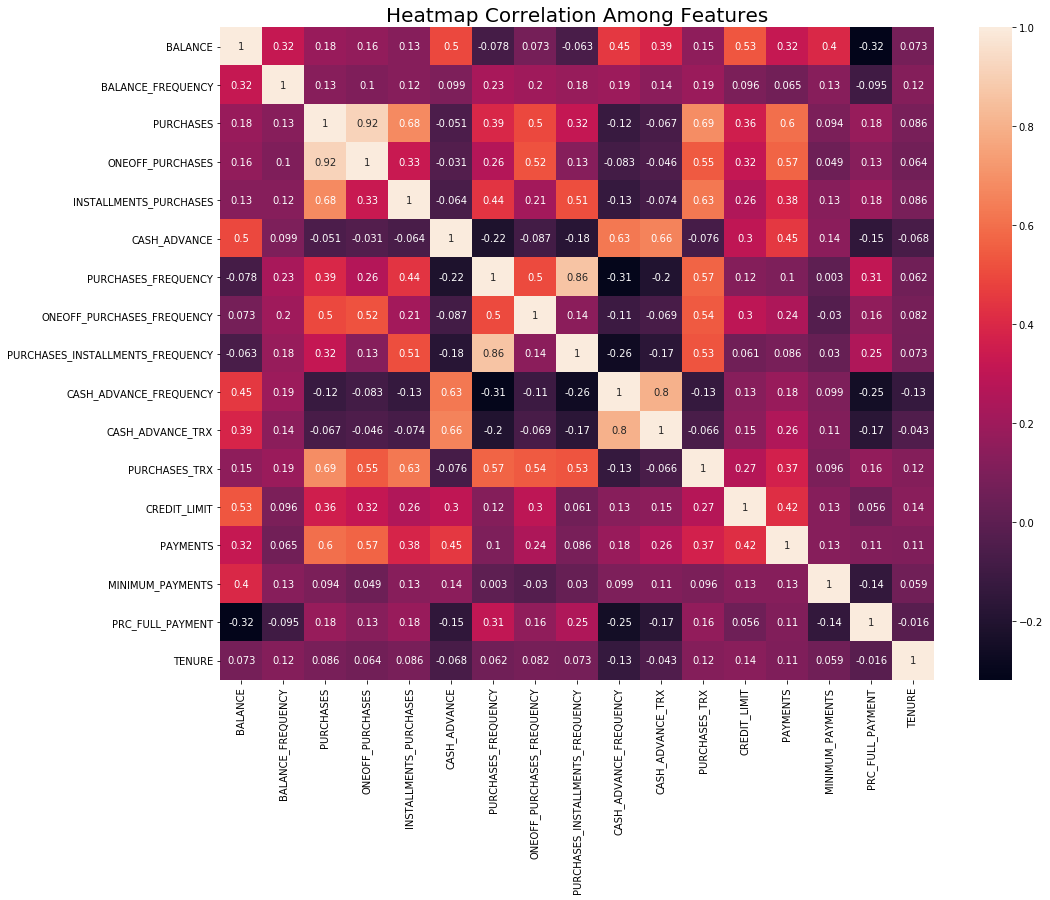

In [3]:
feature = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(16,12))
ax = sns.heatmap(df[feature].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation Among Features', size=20)
plt.show()

In [4]:
def outlier_percentage(data):
    '''
    This function calculates the percentage of outlier in a dataset.
    '''
    quantile_1 = data.quantile(0.25)
    quantile_3 = data.quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_treshold = quantile_1 - (1.5 * IQR)
    upper_threshold = quantile_3 + (1.5 * IQR)
    num_outliers =  np.sum((data < lower_treshold) |(data > upper_threshold))
    outliers =  ((data < lower_treshold) |(data > upper_threshold))
    num_data = data.count()
    return (num_outliers/num_data)*100

In [5]:
def show_outlier(data):
    '''
    This function shows the percentage of outlier in each numerical column.
    '''
    for column in data.columns:
        data_section = data[column]
        percent = str(round(outlier_percentage(data_section), 2))
        print(f'Outlier in column "{column}": {percent}%')
        
non_categorical_data = df.drop(['CUST_ID'], axis=1)
show_outlier(non_categorical_data)

Outlier in column "BALANCE": 7.77%
Outlier in column "BALANCE_FREQUENCY": 16.68%
Outlier in column "PURCHASES": 9.03%
Outlier in column "ONEOFF_PURCHASES": 11.32%
Outlier in column "INSTALLMENTS_PURCHASES": 9.69%
Outlier in column "CASH_ADVANCE": 11.51%
Outlier in column "PURCHASES_FREQUENCY": 0.0%
Outlier in column "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outlier in column "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outlier in column "CASH_ADVANCE_FREQUENCY": 5.87%
Outlier in column "CASH_ADVANCE_TRX": 8.98%
Outlier in column "PURCHASES_TRX": 8.56%
Outlier in column "CREDIT_LIMIT": 2.77%
Outlier in column "PAYMENTS": 9.03%
Outlier in column "MINIMUM_PAYMENTS": 9.74%
Outlier in column "PRC_FULL_PAYMENT": 16.47%
Outlier in column "TENURE": 15.26%


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 2. Treating Missing Value

There are two columns in our dataset containing missing value, namely `CREDIT_LIMIT` and `MINIMUM_PAYMENTS`. We will fill these missing values case by case on the basis of subject knowledge.

### 2.1 Missing Value 1 : CREDIT_LIMIT
There is 1 missing value found in this column. In financial institution, such as bank, the credit limit can be retrieved from `CASH_ADVANCE`. In this case, `CASH_ADVANCE` is normally 30% of the `CREDIT_LIMIT`. 

In [7]:
missing_credit_limit_indeks = df[df['CREDIT_LIMIT'].isna()].index[0]
df.loc[missing_credit_limit_indeks,"CREDIT_LIMIT"] = df.loc[missing_credit_limit_indeks,"CASH_ADVANCE"]/0.3 

### 2.2 Missing Value  2 : MINIMUM_PAYMENTS
There are 313 missing values found in this column which can be grouped in two categories:
1. `MINIMUM_PAYMENT` is empty yet no payment obligation (240 of 313 data)
2. `MINIMUM_PAYMENT` is empty with payment obligation (73 of 313 data)

### Missing Value 2.2.2.1
`MINIMUM_PAYMENTS` will be filled with 0 as there is no payment obligation.

### Missing Value 2.2.2.2
`MINIMUM_PAYMENTS` is empty yet the respective `INSTALLMENTS_PURCHASES` column is filled. In this case, `MINIMUM_PAYMENTS` will be filled with the same amount as shown in `INSTALLMENTS_PURCHASES`.

### Missing Value 2.2.2.3
`MINIMUM_PAYMENTS` and `INSTALLMENTS_PURCHASES` are empty yet the respective `CASH_ADVANCE` is filled. In this case, `MINIMUM_PAYMENTS` will be filled with the same amount as shown in `CASH_ADVANCE`.

### Missing Value 2.3
`MINIMUM_PAYMENTS`, `INSTALLMENTS_PURCHASES`, and `CASH_ADVANCE` are empty. This column will be filled with values contained in the column `PURCHASES` * 10%.

In [8]:
df_missing_minimum_payments = df[df['MINIMUM_PAYMENTS'].isna()]
for i in df_missing_minimum_payments.index:
  if df_missing_minimum_payments.loc[i,'PAYMENTS']==0:
    df.loc[i,'MINIMUM_PAYMENTS'] = 0
  elif df_missing_minimum_payments.loc[i,"INSTALLMENTS_PURCHASES"] != 0:
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"INSTALLMENTS_PURCHASES"]
  elif df_missing_minimum_payments.loc[i,"CASH_ADVANCE"] != 0:
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"CASH_ADVANCE"]
  else :
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"PURCHASES"]*0.1

## 2. Scaling

In [26]:
df_imputed_numerical = df.drop(['CUST_ID'], axis=1)
df_scaled_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_imputed_numerical), columns=df_imputed_numerical.columns)

## 3. Drop outlier

Dapat dilihat melalui distribusi data dan identifikasi outlier yang telah dilakukan sebelumnya bahwa jumlah outlier yang didefinisikan dengan penghitungan IQR sangat banyak. Oleh karena itu, kami memilih untuk melakukan drop outlier dengan mendefinisikan melalui metode Z-score. Dalam hal ini nilai threshold/batasan yang ditentukan adalah 3.

### Z-Score

In [27]:
z_minmax = np.abs(stats.zscore(df_scaled_minmax))

In [28]:
df_scaled_minmax_out = df_scaled_minmax[(z_minmax < 3).all(axis=1)]
df_scaled_minmax_out.shape

(7434, 17)

# Modeling

## Data with outlier

### PCA

1. It identifies the hyperplane thatlies closest to the data, then itprojects the data onto it. 
2. PCA identifies the axis that accounts for the largest amount of variance in the training set.
3. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. 
4. PCA is useful to visualize data in two (or three) dimensions. 
5. It is also used as a preprocessing step to filter out random noise in data. 
6. Better Perspective and less Complexity: When we need a more realistic perspective and we have many features on a given data set and specifically when we have this intuitive knowledge that we don’t need this much number of features.

1. The PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables. So a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If you normalize your data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.

Melakukan PCA untuk melihat kelompok fitur yang mewakili 17 data dengan cara mengkombinasikan fitur-fitur yang informasinya sejenis. PCA akan menghasilkan garis-garis komponen yang akan memperlihatkan seberapa besar jumlah variasi yang merepresentasikan fitur-fitur awal yang kita punya.

In [ ]:
pca = PCA(n_components=17, random_state=42).fit(df_scaled_minmax)
pca_data = pca.transform(df_scaled_minmax) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.482171,-0.097648,-0.046481,-0.058248,0.109996,-0.171660,0.018602,0.015991,0.013088,0.023025,-0.002382,-0.010627,0.004737,-0.001321,-0.005798,-0.003326,-6.751035e-06
1,-0.608572,-0.019366,0.082089,-0.218799,-0.099009,0.136997,0.047463,0.001868,0.005908,-0.002432,0.057571,-0.031658,-0.040518,-0.015550,0.001758,-0.050883,1.398360e-07
2,0.304511,0.920925,0.012298,0.160103,0.162316,-0.158503,-0.006525,-0.277872,0.008561,-0.016616,-0.003769,-0.012036,-0.006794,0.015599,-0.014824,0.008085,9.322756e-07
3,-0.588622,-0.005642,0.037140,0.004463,0.223740,0.065238,0.096044,-0.020029,-0.041681,-0.000022,-0.031162,0.029409,0.023677,-0.012714,-0.003778,-0.015143,-5.133040e-07
4,-0.554359,0.052989,-0.084180,-0.132782,-0.017052,-0.204479,0.056389,0.051733,0.019925,0.000586,0.014643,-0.010032,0.002845,-0.000431,-0.008285,0.004704,-3.420136e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.646910,-0.463139,0.210296,0.613488,-0.663579,-0.149471,0.086382,-0.083557,0.026687,0.013949,0.020587,-0.004054,0.011057,-0.009559,0.000065,0.012827,-7.299277e-06
8946,0.549884,-0.406737,-0.214458,0.779956,-0.505314,-0.193510,0.101760,-0.087909,-0.002811,0.047608,0.024370,-0.005934,0.010736,-0.005037,0.002274,0.012701,-8.291978e-06
8947,0.360378,-0.422724,0.105842,0.744893,-0.480378,-0.135117,0.090643,-0.072595,0.022604,0.019645,0.014982,-0.007803,0.011723,-0.009618,0.001231,0.012213,-6.882057e-06
8948,-0.646105,-0.204437,0.281742,0.632956,-0.571218,-0.104791,0.095869,0.119300,-0.001049,-0.004885,-0.005785,-0.001768,0.002971,0.003104,0.002342,0.014281,-3.628623e-06


In [ ]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)
explained_var_ratio_per_PCA_df

,0
PC1,49.596882
PC2,14.054177
PC3,12.844617
PC4,7.677083
PC5,6.963593
PC6,3.588112
PC7,1.819182
PC8,1.352928
PC9,0.655516
PC10,0.550865


In [ ]:
print(f"Total variasi yang dapat dijelaskan dengan 17 Komponen Utama adalah :{pca.explained_variance_ratio_.sum()*100}")

Total variasi yang dapat dijelaskan dengan 17 Komponen Utama adalah :99.99999999999999


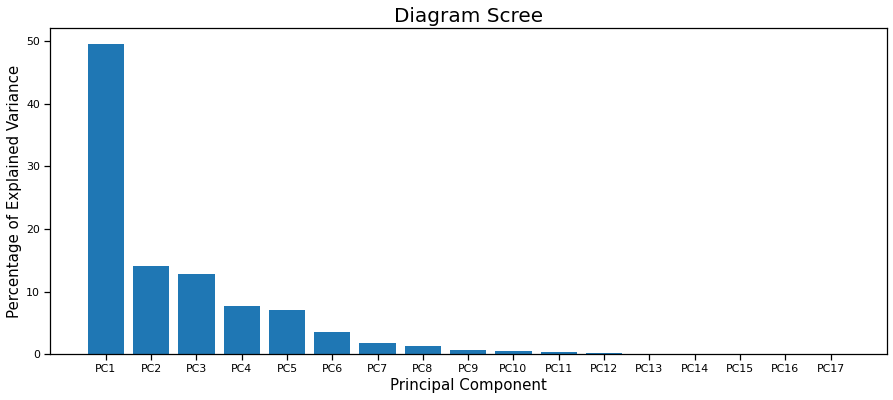

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

In [ ]:
print(f"Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :{pca.explained_variance_ratio_[:2].sum()*100}")

Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :63.651059344717275


Diagram Scree diatas menunjukkan prosentase variasi yang dapat dijelaskan oleh 17 komponen utama yang terbentuk dari PCA. Dapat dilihat bahwa Principal Komponen 1 (PC1) dan Principal Komponen 2 (PC2) sudah dapat menjelaskan lebih dari 60% variasi yang ada. Oleh karena itu, hanya kedua komponen tersebut yang akan dianalisa lebih lanjut. 

### K-Means Clustering

Kedua garis komponen tersebut akan dianalisa lebih lanjut dengan menggunakan algoritma K-Means. Tujuan algoritma ini adalah untuk mencari pusat data pada kedua garis komponen tersebut (centroid). Jika centroid sudah diketahui maka kita dapat mencari cluster data di kedua garis komponen tersebut.

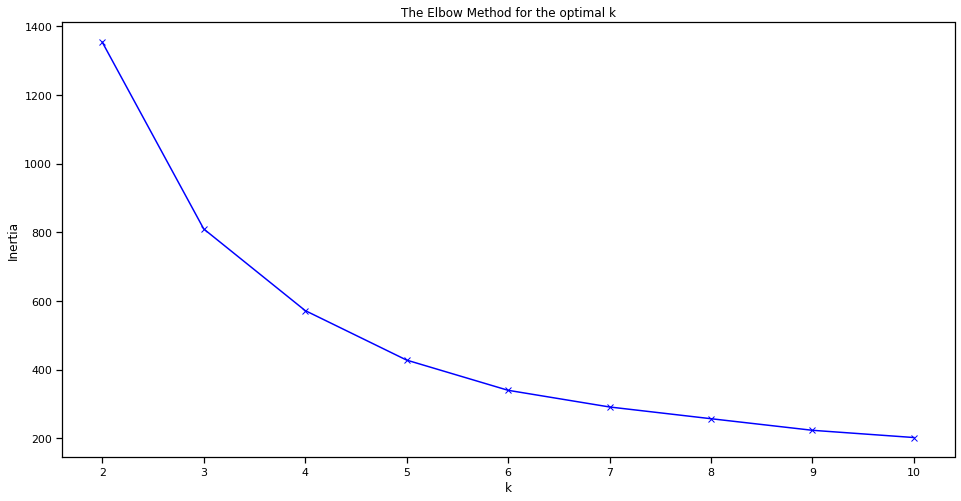

In [ ]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

# Cari skor inertia dengan elbow method untuk ukur k terbaik cluster (mengukur jarak antar data poin dan centroidnya, squaring, lalu dijumlah)

inertia = []
K = np.arange(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

In [ ]:
# Evaluasi menggunakan silhouette score

silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

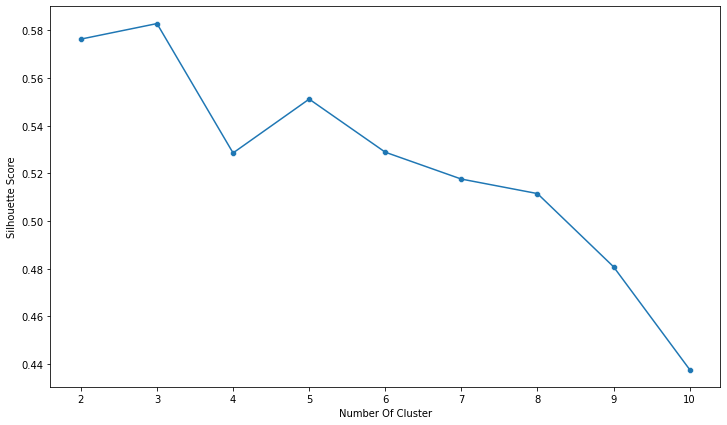

In [ ]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

K cluster yang dipilih adalah 3 karena penurunan inertia ke 4 sudah tidak signifikan, serta nilai silhouette score paling tinggi

In [ ]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_pusat = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

In [ ]:
# melihat centroid tiap cluster
cluster_pusat

array([[ 0.54452985, -0.268751  ],
       [-0.49202812, -0.00388067],
       [ 0.54883987,  0.49079783]])

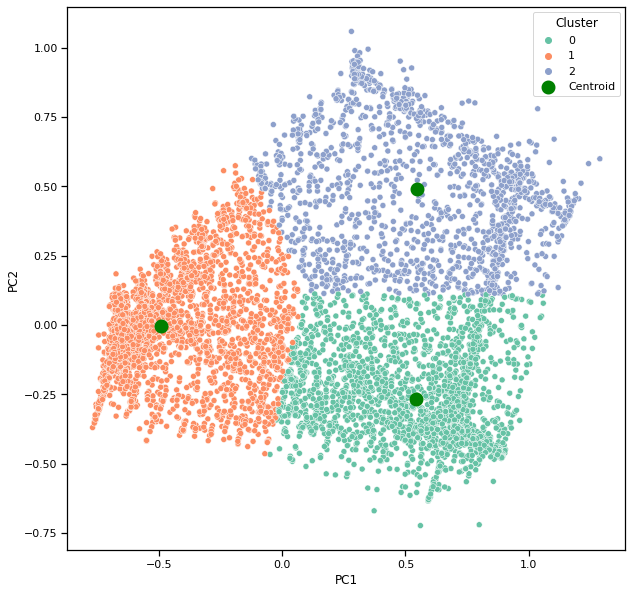

In [ ]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_pusat[:,0],cluster_pusat[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
df_copy = df_scaled_minmax.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

1    4709
0    2718
2    1523
Name: cluster, dtype: int64

In [ ]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [ ]:
cluster_0.sort_values(ascending=False)

TENURE                              0.916605
BALANCE_FREQUENCY                   0.907176
PURCHASES_FREQUENCY                 0.866448
PURCHASES_INSTALLMENTS_FREQUENCY    0.816456
PRC_FULL_PAYMENT                    0.253548
CREDIT_LIMIT                        0.127292
ONEOFF_PURCHASES_FREQUENCY          0.086315
PURCHASES_TRX                       0.055972
BALANCE                             0.055473
CASH_ADVANCE_FREQUENCY              0.044151
INSTALLMENTS_PURCHASES              0.034687
PAYMENTS                            0.026438
PURCHASES                           0.020718
CASH_ADVANCE_TRX                    0.012913
MINIMUM_PAYMENTS                    0.011744
CASH_ADVANCE                        0.010002
ONEOFF_PURCHASES                    0.005797
dtype: float64

In [ ]:
cluster_1.sort_values(ascending=False)

TENURE                              0.906987
BALANCE_FREQUENCY                   0.827651
PURCHASES_FREQUENCY                 0.142406
CREDIT_LIMIT                        0.136794
CASH_ADVANCE_FREQUENCY              0.124517
BALANCE                             0.089928
ONEOFF_PURCHASES_FREQUENCY          0.082722
PRC_FULL_PAYMENT                    0.066528
PURCHASES_INSTALLMENTS_FREQUENCY    0.058725
CASH_ADVANCE_TRX                    0.035946
PAYMENTS                            0.029064
CASH_ADVANCE                        0.028736
MINIMUM_PAYMENTS                    0.010648
PURCHASES_TRX                       0.007466
PURCHASES                           0.006057
ONEOFF_PURCHASES                    0.005783
INSTALLMENTS_PURCHASES              0.002733
dtype: float64

In [ ]:
cluster_2.sort_values(ascending=False)

BALANCE_FREQUENCY                   0.977322
TENURE                              0.963668
PURCHASES_FREQUENCY                 0.894973
ONEOFF_PURCHASES_FREQUENCY          0.779945
PURCHASES_INSTALLMENTS_FREQUENCY    0.502989
PRC_FULL_PAYMENT                    0.245123
CREDIT_LIMIT                        0.221844
PURCHASES_TRX                       0.118489
BALANCE                             0.105735
CASH_ADVANCE_FREQUENCY              0.065664
PURCHASES                           0.064513
PAYMENTS                            0.063756
ONEOFF_PURCHASES                    0.057186
INSTALLMENTS_PURCHASES              0.037010
CASH_ADVANCE_TRX                    0.021033
CASH_ADVANCE                        0.015335
MINIMUM_PAYMENTS                    0.010407
dtype: float64

Dengan analisa lebih lanjut dari kedua Principal Komponen yang dipilih sebelumnya terbentuk 3 kluster dengan pusat seperti terlihat pada diagram diatas dengan fitur-fitur pembentuk seperti terlihat pada tabel. 

In [ ]:
def buat_radar_chart(dataset, judul):

    rerata_fitur_per_cluster = dataset.groupby("cluster").mean().to_numpy()
    nama_fitur = dataset.columns[0:-1]
    categories = np.arange(0, len(rerata_fitur_per_cluster))
    
    fig = go.Figure()

    for i in range(len(rerata_fitur_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=rerata_fitur_per_cluster[i],
          theta=nama_fitur,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(rerata_fitur_per_cluster), np.max(rerata_fitur_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({judul})\n',
                   font=dict(size=20))
    )

    fig.show()

buat_radar_chart(df_copy, 'Credit Card Dataset')

Berdasar hasil diagram di atas dapat dilihat terdapat 3 cluster yang memiliki karakteristik sebagai berikut,

1. Cluster 0 (Garis biru)
Cluster ini ditandai dengan aktivitas belanja secara installment yang tinggi, sebagaimana terlihat pada fitur .. dan ..
2. Cluster 1 (Garis merah)
Cluster ini ditandai dengan aktivitas belanja yang kurang aktif dibandingkan dengan kedua cluster lain, walaupun memiliki balance lebih tinggi dibandingkan cluster 0
3. Cluster 2 (Garis hijau)
Cluster ini ditandai dengan aktivitas belanja yang paling aktif baik secara installment maupun one off purchase

Dari sudut pandang bisnis, ketiga cluster customer tersebut tidak memiliki potensi untuk menimbulkan masalah bagi stakeholder(bank). Hal ini karena aktivitas transaksi yang tergolong normal. Sebagai Data Scientist kita dapat memberikan beberapa masukan kepada stakeholder untuk meningkatkan revenue dengan mengandalkan cluster yang telah terbentuk. Adapun masukan yang dapat disampaikan adalah:
1. Cluster 0, perlu dimaintain agar tetap aktif dengan cara tawarkan penambahan limit, tawarkan produk-produk bank sejenis jika pembayarannya bagus
1. Cluster 1, tawarkan program-program untuk uang tunai(cash advance/dana tunai by phone dengan bunga lebih rendah) karena limit tidak terpakai
1. Cluster 2, memberi penawaran produk-produk bank dengan benefit yg besar agar tetap aktif melakukan transaksi 

Jika terdapat data tambahan yang lebih komprehensif, analisis cluster ini dapat dikembangkan lebih lanjut untuk melihat customer mana yang pembayarannya baik.



## Data with dropped outlier

### PCA

In [ ]:
pca = PCA(n_components=17, random_state=42).fit(df_scaled_minmax_out)
pca_data = pca.transform(df_scaled_minmax_out) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)

In [ ]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)
explained_var_ratio_per_PCA_df

,0
PC1,54.572232
PC2,15.690030
PC3,14.374263
PC4,6.578125
PC5,3.097724
PC6,2.224570
PC7,1.364519
PC8,1.232717
PC9,0.464708
PC10,0.144436


In [ ]:
print(f"Total variasi yang dapat dijelaskan dengan 17 Komponen Utama adalah :{pca.explained_variance_ratio_.sum()*100}")

Total variasi yang dapat dijelaskan dengan 17 Komponen Utama adalah :99.99999999999999


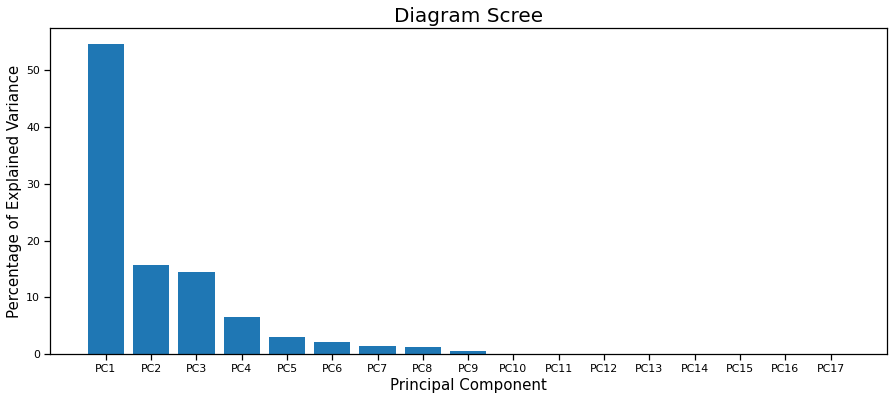

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

In [ ]:
print(f"Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :{pca.explained_variance_ratio_[:2].sum()*100}")

Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :70.26226213288474


Diagram Scree diatas menunjukkan prosentase variasi yang dapat dijelaskan oleh 17 komponen utama yang terbentuk dari PCA. Dapat dilihat bahwa Principal Komponen 1 (PC1) dan Principal Komponen 2 (PC2) sudah dapat menjelaskan lebih dari 70% variasi yang ada. Oleh karena itu, hanya kedua komponen tersebut yang akan dianalisa lebih lanjut.

### K-Means Clustering

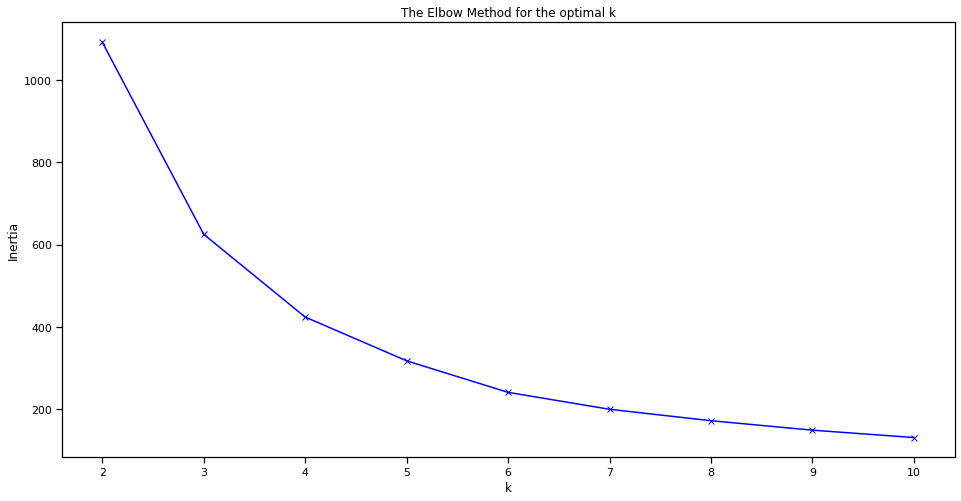

In [ ]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

# Cari skor inertia dengan elbow method untuk ukur k terbaik cluster

inertia = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

In [ ]:
# Evaluasi menggunakan silhouette score

silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

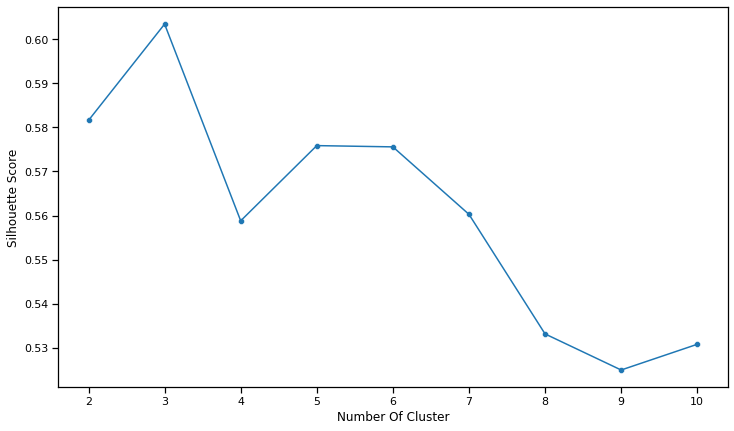

In [ ]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

K cluster yang dipilih adalah 3 karena penurunan inertia ke 4 sudah tidak signifikan, serta nilai silhouette score paling tinggi

In [ ]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_pusat = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

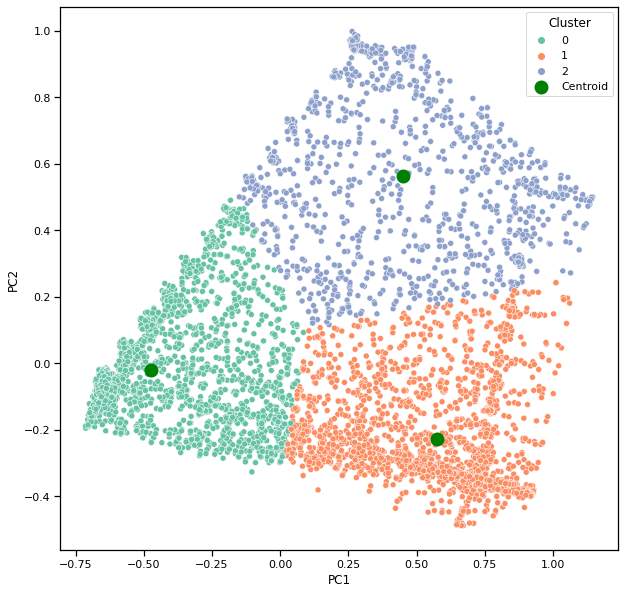

In [ ]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_pusat[:,0],cluster_pusat[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
df_copy = df_scaled_minmax_out.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

0    3940
1    2384
2    1110
Name: cluster, dtype: int64

In [ ]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [ ]:
cluster_0.sort_values(ascending=False)

TENURE                              0.952453
BALANCE_FREQUENCY                   0.844099
PURCHASES_FREQUENCY                 0.146279
CREDIT_LIMIT                        0.122347
CASH_ADVANCE_FREQUENCY              0.103395
ONEOFF_PURCHASES_FREQUENCY          0.080910
BALANCE                             0.076201
PRC_FULL_PAYMENT                    0.067722
PURCHASES_INSTALLMENTS_FREQUENCY    0.063978
CASH_ADVANCE_TRX                    0.026462
PAYMENTS                            0.022872
CASH_ADVANCE                        0.020337
MINIMUM_PAYMENTS                    0.007678
PURCHASES_TRX                       0.007542
PURCHASES                           0.005602
ONEOFF_PURCHASES                    0.005288
INSTALLMENTS_PURCHASES              0.002638
dtype: float64

In [ ]:
cluster_1.sort_values(ascending=False)

TENURE                              0.961270
BALANCE_FREQUENCY                   0.926465
PURCHASES_FREQUENCY                 0.868194
PURCHASES_INSTALLMENTS_FREQUENCY    0.821436
PRC_FULL_PAYMENT                    0.254628
CREDIT_LIMIT                        0.123612
ONEOFF_PURCHASES_FREQUENCY          0.101289
PURCHASES_TRX                       0.054104
BALANCE                             0.048095
CASH_ADVANCE_FREQUENCY              0.035677
INSTALLMENTS_PURCHASES              0.031205
PAYMENTS                            0.023814
PURCHASES                           0.019714
CASH_ADVANCE_TRX                    0.009440
MINIMUM_PAYMENTS                    0.007347
CASH_ADVANCE                        0.006823
ONEOFF_PURCHASES                    0.006504
dtype: float64

In [ ]:
cluster_2.sort_values(ascending=False)

TENURE                              0.973724
BALANCE_FREQUENCY                   0.972241
PURCHASES_FREQUENCY                 0.869297
ONEOFF_PURCHASES_FREQUENCY          0.783448
PURCHASES_INSTALLMENTS_FREQUENCY    0.402920
PRC_FULL_PAYMENT                    0.247941
CREDIT_LIMIT                        0.183428
PURCHASES_TRX                       0.082601
BALANCE                             0.072813
CASH_ADVANCE_FREQUENCY              0.046065
PURCHASES                           0.040630
PAYMENTS                            0.038998
ONEOFF_PURCHASES                    0.038122
INSTALLMENTS_PURCHASES              0.019493
CASH_ADVANCE_TRX                    0.011822
CASH_ADVANCE                        0.008629
MINIMUM_PAYMENTS                    0.007101
dtype: float64

Dengan analisa lebih lanjut dari kedua Principal Komponen yang dipilih sebelumnya terbentuk 3 kluster dengan pusat seperti terlihat pada diagram diatas dengan fitur-fitur pembentuk seperti terlihat pada tabel. 

In [ ]:
def buat_radar_chart(dataset, judul):

    rerata_fitur_per_cluster = dataset.groupby("cluster").mean().to_numpy()
    nama_fitur = dataset.columns[0:-1]
    categories = np.arange(0, len(rerata_fitur_per_cluster))
    
    fig = go.Figure()

    for i in range(len(rerata_fitur_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=rerata_fitur_per_cluster[i],
          theta=nama_fitur,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(rerata_fitur_per_cluster), np.max(rerata_fitur_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({judul})\n',
                   font=dict(size=20))
    )

    fig.show()

buat_radar_chart(df_copy, 'Credit Card Dataset')

Dapat dilihat perbandingan dari kedua diagram (with outlier dan dropped outlier) tidak terdapat perbedaan yang signifikan dalam cluster yang terbentuk. Selain itu, tidak terdapat perbedaan yang signifikan pada hasil evaluasi yang terlihat pada nilai silhouette score.

Dikarenakan tidak terlihat adanya fenomena cluster customer yang dapat berdampak pada stakeholder, oleh karena itu akan dicoba untuk analisis clustering menggunakan teknik scaling lain yaitu Standard scaler dan Robust scaler. Data yang digunakan pada teknik scaling Standard scaler adalah data dengan outlier dikarenakan pada analisis sebelumnya tidak terdapat perbedaan yang signifikan antara hasil clustering dengan atau tanpa outlier. Serta penghilangan outlier akan berimbas pada hilangnya lebih dari 2000 data. Kami menganggap bahwa jumlah tersebut cukup besar dan mungkin dapat berakibat pada hilangnya informasi tertentu. Sedangkan, data yang digunakan pada teknik scaling Robust scaler adalah data dengan dropped outlier dikarenakan terdapat fitur-fitur yang memiliki outlier cukup besar yang akan mempengaruhi efektivitas metode scaling Robust itu sendiri.

## Standard Scaler

### PCA

In [ ]:
df_scaled_standard = pd.DataFrame(StandardScaler().fit_transform(df_imputed_numerical), columns=df_imputed_numerical.columns)

In [ ]:
pca = PCA(n_components=17, random_state=42).fit(df_scaled_standard)
pca_data = pca.transform(df_scaled_standard) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)

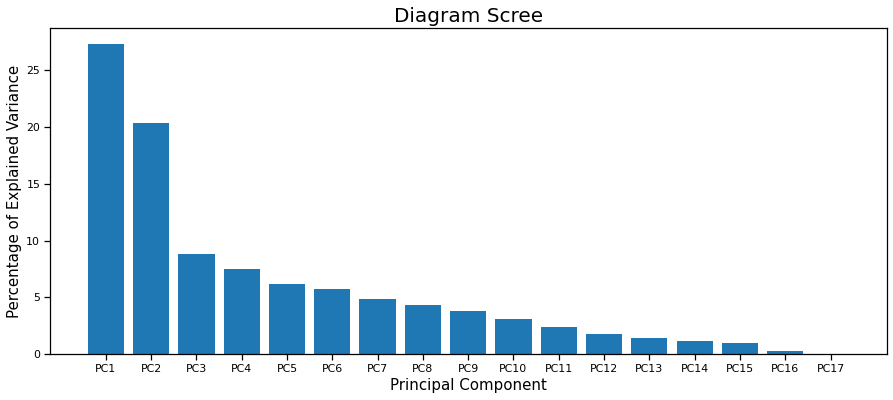

Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :47.61928459623358


In [ ]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)

fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

print(f"Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :{pca.explained_variance_ratio_[:2].sum()*100}")

### K-Means clustering

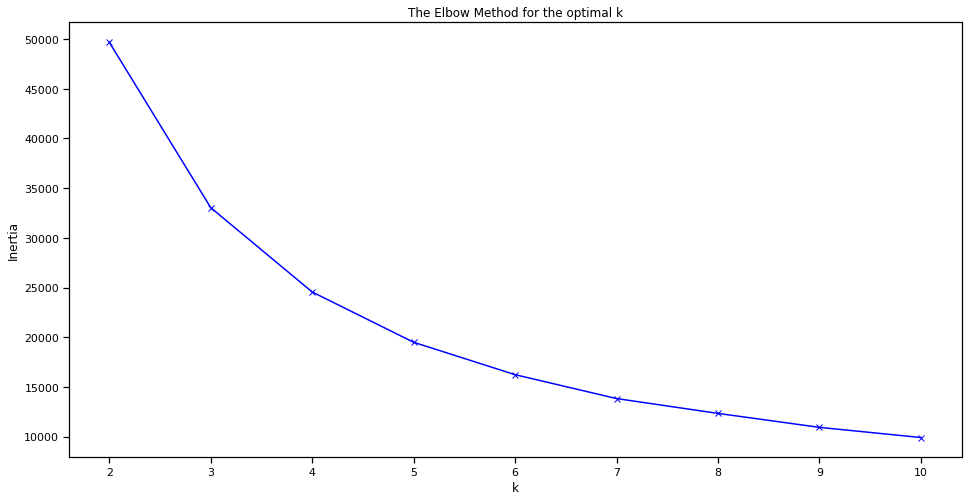

In [ ]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

# Cari skor inertia dengan elbow method untuk ukur k terbaik cluster

inertia = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

In [ ]:
# Evaluasi menggunakan silhouette score

silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

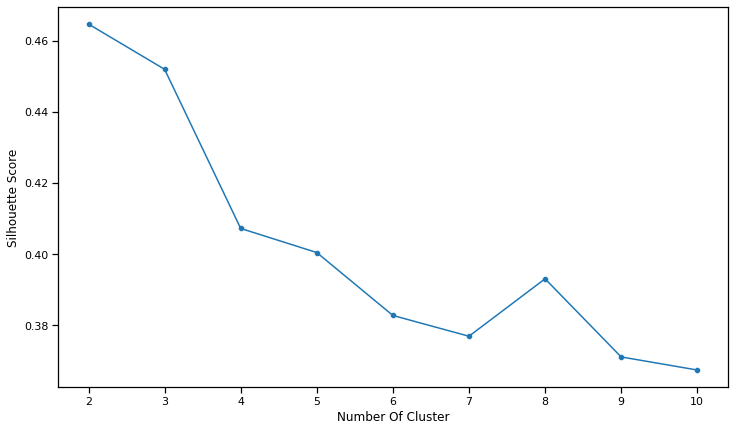

In [ ]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

K cluster yang dipilih adalah 3 karena penurunan inertia ke 4 sudah tidak signifikan, serta untuk meneyesuaikan pada clustering sebelumnya dengan jumlah cluster yang sama yaitu 3.

In [ ]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_pusat = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

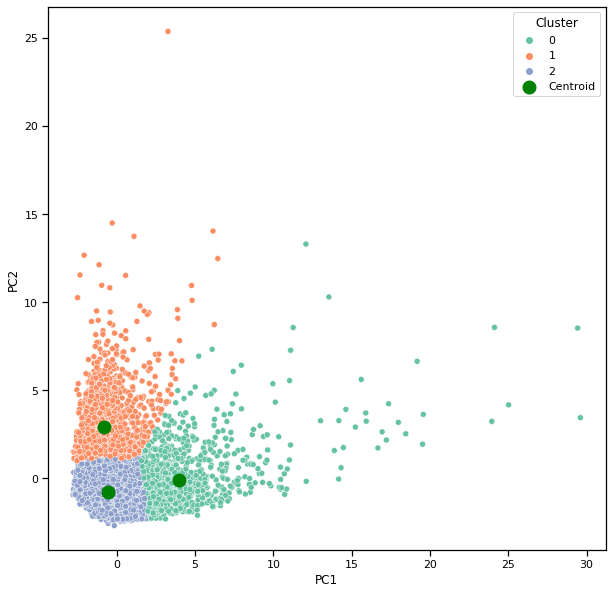

In [ ]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_pusat[:,0],cluster_pusat[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
df_copy = df_scaled_standard.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

2    6109
1    1648
0    1193
Name: cluster, dtype: int64

In [ ]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [ ]:
cluster_0.sort_values(ascending=False)

PURCHASES_TRX                       1.724084
PURCHASES                           1.579981
ONEOFF_PURCHASES_FREQUENCY          1.501737
INSTALLMENTS_PURCHASES              1.342260
ONEOFF_PURCHASES                    1.302611
PURCHASES_FREQUENCY                 1.147640
PURCHASES_INSTALLMENTS_FREQUENCY    1.016771
CREDIT_LIMIT                        0.893419
PAYMENTS                            0.887186
PRC_FULL_PAYMENT                    0.504432
BALANCE_FREQUENCY                   0.440155
BALANCE                             0.346018
TENURE                              0.301802
MINIMUM_PAYMENTS                    0.199633
CASH_ADVANCE                       -0.228940
CASH_ADVANCE_TRX                   -0.229796
CASH_ADVANCE_FREQUENCY             -0.340260
dtype: float64

In [ ]:
cluster_1.sort_values(ascending=False)

CASH_ADVANCE_FREQUENCY              1.504421
CASH_ADVANCE                        1.338559
CASH_ADVANCE_TRX                    1.291609
BALANCE                             1.132936
CREDIT_LIMIT                        0.579020
PAYMENTS                            0.424448
MINIMUM_PAYMENTS                    0.397556
BALANCE_FREQUENCY                   0.334941
TENURE                             -0.109520
ONEOFF_PURCHASES                   -0.211491
PURCHASES                          -0.299910
INSTALLMENTS_PURCHASES             -0.320646
ONEOFF_PURCHASES_FREQUENCY         -0.323301
PURCHASES_TRX                      -0.386807
PRC_FULL_PAYMENT                   -0.417241
PURCHASES_INSTALLMENTS_FREQUENCY   -0.592356
PURCHASES_FREQUENCY                -0.686150
dtype: float64

In [ ]:
cluster_2.sort_values(ascending=False)

PRC_FULL_PAYMENT                    0.014049
TENURE                             -0.029393
PURCHASES_INSTALLMENTS_FREQUENCY   -0.038763
PURCHASES_FREQUENCY                -0.039018
MINIMUM_PAYMENTS                   -0.146233
INSTALLMENTS_PURCHASES             -0.175625
BALANCE_FREQUENCY                  -0.176312
ONEOFF_PURCHASES                   -0.197328
ONEOFF_PURCHASES_FREQUENCY         -0.206052
PURCHASES                          -0.227642
PURCHASES_TRX                      -0.232342
PAYMENTS                           -0.287756
CASH_ADVANCE_TRX                   -0.303556
CASH_ADVANCE                       -0.316389
CREDIT_LIMIT                       -0.330672
CASH_ADVANCE_FREQUENCY             -0.339394
BALANCE                            -0.373200
dtype: float64

Dengan analisa lebih lanjut dari kedua Principal Komponen yang dipilih sebelumnya terbentuk 3 kluster dengan pusat seperti terlihat pada diagram diatas dengan fitur-fitur pembentuk seperti terlihat pada tabel. 

In [ ]:
def buat_radar_chart(dataset, judul):

    rerata_fitur_per_cluster = dataset.groupby("cluster").mean().to_numpy()
    nama_fitur = dataset.columns[0:-1]
    categories = np.arange(0, len(rerata_fitur_per_cluster))
    
    fig = go.Figure()

    for i in range(len(rerata_fitur_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=rerata_fitur_per_cluster[i],
          theta=nama_fitur,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(rerata_fitur_per_cluster), np.max(rerata_fitur_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({judul})\n',
                   font=dict(size=20))
    )

    fig.show()

buat_radar_chart(df_copy, 'Credit Card Dataset')

Berdasar hasil diagram di atas dapat dilihat terdapat 3 cluster yang memiliki karakteristik sebagai berikut,
1. Cluster 0 (Garis biru)
Cluster ini ditandai dengan aktivitas belanja paling aktif baik secara installment dan one off purchase, serta seringkali melakukan pembayaran lunas
2. Cluster 1 (Garis merah)
Cluster ini ditandai dengan aktivitas cash advance (tarik tunai) yang sangat aktif dibandingkan dengan kedua cluster lain, namun customer pada cluster ini memiliki kecenderungan untuk tidak langsung melunasi tagihannya, serta memiliki minimum payments yang tinggi. Kecenderungan ini tergolong riskan karena mengarah pada NPL (Non-performance loan).
3. Cluster 2 (Garis hijau)
Cluster ini ditandai dengan aktivitas transaksi yang paling sedikit jika dibandingkan cluster lain. Customer pada cluster ini cenderung tergolong memiliki daya beli yang rendah.

Secara umum clustering dengan teknik scaling ini dapat menangkap pola yang cenderung sama dengan clustering dengan teknik scaling sebelumnya (Min Max Scaler). Namun, teknik ini dapat menangkap satu pola yang berbeda seperti terlihat pada Cluster 1. Seperti yang sudah dijelaskan sebelumnya, cluster ini dapat beresiko default (gagal bayar) yang dapat merugikan baik stakeholder ataupun customer tersebut.Oleh karena itu, perlu dilakukan pendekatan khusus untuk cluster ini. Metode paling efektif yang dapat kami sarankan adalah menawarkan cash advance via telemarketing/by phone (karena masih ada sisa kredit limit) sehingga dapat diubah menjadi installments untuk kelonggaran pembayaran dengan cicilan. Analisis ini dapat dikembangkan lebih lanjut jika terdapat data tambahan yang berisi informasi mengenai customer yang melakukan pembayaran dengan baik, sehingga treatment dapat lebih difokuskan pada customer yang lebih riskan.

## Robust Scaler

In [ ]:
df_imputed_numerical = df.drop(['CUST_ID'], axis=1)
df_scaled_robust = pd.DataFrame(RobustScaler().fit_transform(df_imputed_numerical), columns=df_imputed_numerical.columns)

z_robust = np.abs(stats.zscore(df_scaled_robust))

df_scaled_robust_out = df_scaled_robust[(z_robust < 3).all(axis=1)]
df_scaled_robust_out.shape

(7434, 17)

### PCA

In [ ]:
pca = PCA(n_components=17, random_state=42).fit(df_scaled_robust_out)
pca_data = pca.transform(df_scaled_robust_out) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)

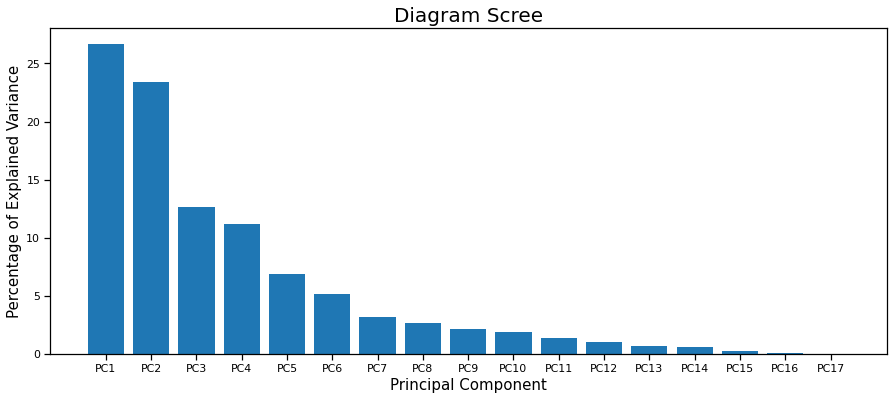

Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :50.035930368607026


In [ ]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)

fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

print(f"Total variasi yang dapat dijelaskan dengan PC1 dan PC2 adalah :{pca.explained_variance_ratio_[:2].sum()*100}")

### K-Means clustering

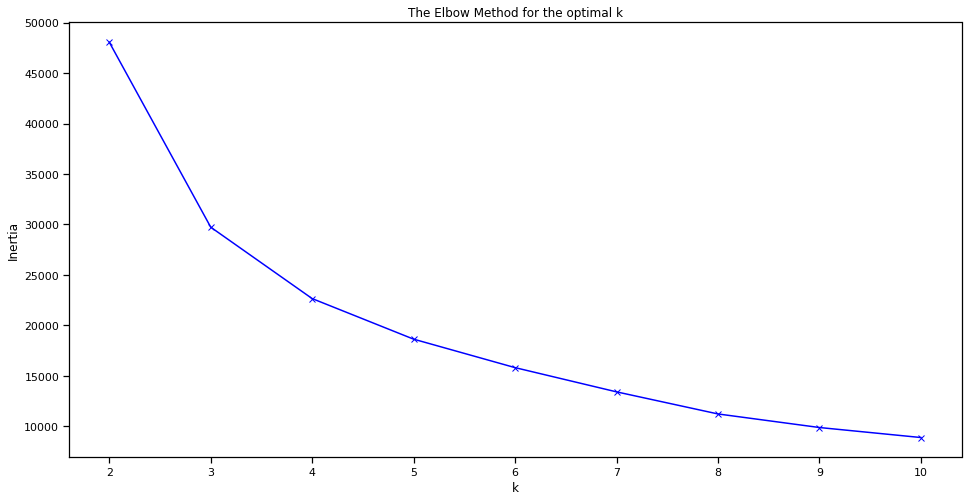

In [ ]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

# Cari skor inertia dengan elbow method untuk ukur k terbaik cluster

inertia = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

In [ ]:
# Evaluasi menggunakan silhouette score

from sklearn.metrics import silhouette_score 

silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

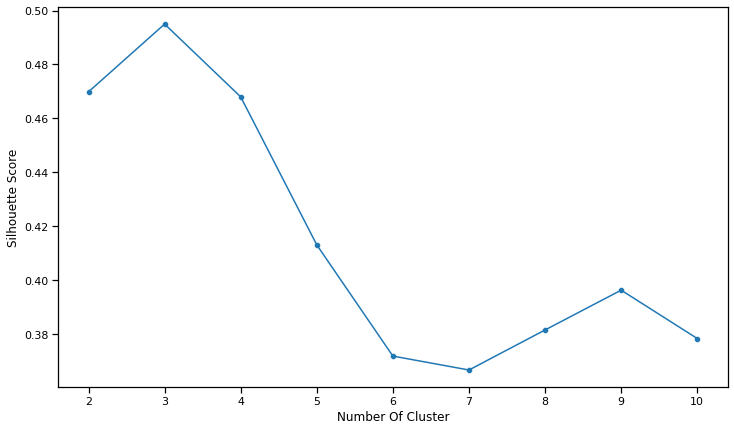

In [ ]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

K cluster yang dipilih adalah 3 karena penurunan inertia ke 4 sudah tidak signifikan, serta untuk meneyesuaikan pada clustering sebelumnya dengan jumlah cluster yang sama yaitu 3.

In [ ]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_pusat = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

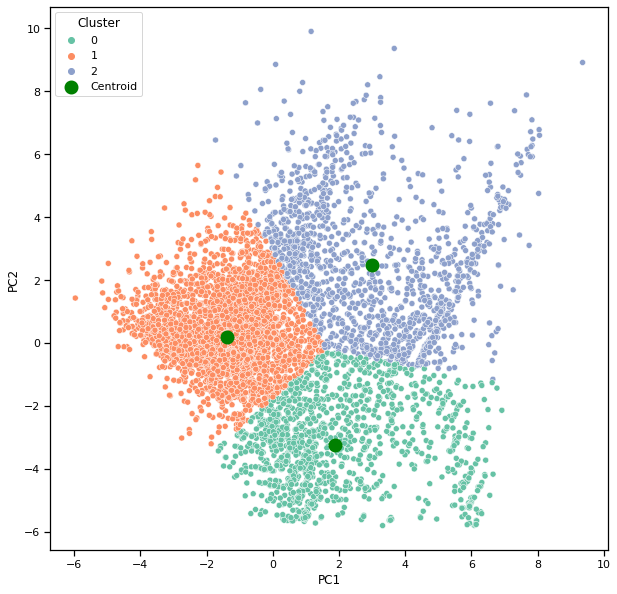

In [ ]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_pusat[:,0],cluster_pusat[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
df_copy = df_scaled_robust_out.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

1    4750
2    1354
0    1330
Name: cluster, dtype: int64

In [ ]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [ ]:
cluster_0.sort_values(ascending=False)

PRC_FULL_PAYMENT                    2.129586
CASH_ADVANCE                        0.250213
INSTALLMENTS_PURCHASES              0.220369
ONEOFF_PURCHASES                    0.201554
CASH_ADVANCE_TRX                    0.184586
CASH_ADVANCE_FREQUENCY              0.156489
PURCHASES_INSTALLMENTS_FREQUENCY    0.150459
CREDIT_LIMIT                        0.082772
PAYMENTS                            0.004688
PURCHASES                          -0.014204
ONEOFF_PURCHASES_FREQUENCY         -0.047032
PURCHASES_TRX                      -0.079840
PURCHASES_FREQUENCY                -0.168294
MINIMUM_PAYMENTS                   -0.249012
TENURE                             -0.380451
BALANCE                            -0.398046
BALANCE_FREQUENCY                  -4.513053
dtype: float64

In [ ]:
cluster_1.sort_values(ascending=False)

CASH_ADVANCE                        0.832750
CASH_ADVANCE_TRX                    0.814368
MINIMUM_PAYMENTS                    0.723454
CASH_ADVANCE_FREQUENCY              0.692625
BALANCE                             0.438805
ONEOFF_PURCHASES                    0.355186
INSTALLMENTS_PURCHASES              0.248501
PAYMENTS                            0.215656
ONEOFF_PURCHASES_FREQUENCY          0.189240
PRC_FULL_PAYMENT                    0.172527
PURCHASES_INSTALLMENTS_FREQUENCY    0.159201
CREDIT_LIMIT                        0.156965
PURCHASES_TRX                       0.083211
PURCHASES                           0.081290
PURCHASES_FREQUENCY                -0.119975
BALANCE_FREQUENCY                  -0.214857
TENURE                             -0.240421
dtype: float64

In [ ]:
cluster_2.sort_values(ascending=False)

PRC_FULL_PAYMENT                    3.243470
ONEOFF_PURCHASES                    2.295540
PURCHASES                           1.738478
INSTALLMENTS_PURCHASES              1.642830
PURCHASES_TRX                       1.522110
ONEOFF_PURCHASES_FREQUENCY          1.377366
PAYMENTS                            0.832818
PURCHASES_INSTALLMENTS_FREQUENCY    0.690674
PURCHASES_FREQUENCY                 0.492284
CREDIT_LIMIT                        0.488082
MINIMUM_PAYMENTS                    0.159612
CASH_ADVANCE                        0.145134
CASH_ADVANCE_TRX                    0.138663
CASH_ADVANCE_FREQUENCY              0.126250
BALANCE                            -0.018167
TENURE                             -0.151403
BALANCE_FREQUENCY                  -0.266183
dtype: float64

Dengan analisa lebih lanjut dari kedua Principal Komponen yang dipilih sebelumnya terbentuk 3 kluster dengan pusat seperti terlihat pada diagram diatas dengan fitur-fitur pembentuk seperti terlihat pada tabel. 

In [ ]:
def buat_radar_chart(dataset, judul):

    rerata_fitur_per_cluster = dataset.groupby("cluster").mean().to_numpy()
    nama_fitur = dataset.columns[0:-1]
    categories = np.arange(0, len(rerata_fitur_per_cluster))
    
    fig = go.Figure()

    for i in range(len(rerata_fitur_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=rerata_fitur_per_cluster[i],
          theta=nama_fitur,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(rerata_fitur_per_cluster), np.max(rerata_fitur_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({judul})\n',
                   font=dict(size=20))
    )

    fig.show()

buat_radar_chart(df_copy, 'Credit Card Dataset')

Berdasar hasil diagram di atas dapat dilihat terdapat 3 cluster yang memiliki karakteristik sebagai berikut,

1. Cluster 0 (Garis biru)   
Cluster ini ditandai dengan aktivitas belanja yang paling tidak aktif, namun cukup sering dalam melakukan transaksi full payment.
2. Cluster 1 (Garis merah)   
Cluster ini ditandai dengan aktivitas cash advance (tarik tunai) yang paling aktif dibandingkan dengan kedua cluster lain, serta memiliki minimum payments yang tinggi. Customer pada cluster ini memiliki kecenderungan untuk tidak langsung melunasi tagihannya. Kecenderungan ini tergolong riskan karena mengarah pada NPL (Non-performance loan).
3. Cluster 2 (Garis hijau)   
Cluster ini ditandai dengan aktivitas transaksi yang paling aktif, terutama pada transaksi one off purchase, serta paling sering untuk melakukan transaksi full payment dibandingkan kedua cluster lainnya.

Clustering dengan menggunakan teknik scaling ini sejalan dengan clustering sebelumnya (Standard scaler). Dapat dilihat adanya kelompok customer yang tergolong riskan dan beresiko default (gagal bayar). Metode yang sama dapat kami sarankan yaitu dengan menawarkan cash advance via telemarketing/by phone untuk diubah menjadi installments sehingga ada kelonggaran pembayaran dengan cicilan.

# Modeling lainnya

Selanjutnya, akan dilakukan percobaan modeling menggunakan algoritma lain, yaitu DBScan dan Agglomerative clustering. Hal ini digunakan sebagai perbandingan serta untuk memastikan jumlah cluster yang terbentuk di tiap model dengan model K-Means yang telah dilakukan sebelumnya.  
Kedua model ini mengikuti data PCA dengan Min Max Scaling dengan outlier.

## DBScan

In [ ]:
pca = PCA(n_components=17, random_state=42).fit(df_scaled_minmax)
pca_data = pca.transform(df_scaled_minmax) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)

In [ ]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

for eps in np.array([i/100 for i in range(8,20,1)]):
  for min_samples in np.array([i for i in range(10,400,10)]):
    try:
      dbscan = DBSCAN(eps=eps, min_samples=min_samples)
      labels = dbscan.fit_predict(pca_clusters)
      silh = silhouette_score(pca_clusters, labels)
      if silh > 0.4 :
        print("\neps={}".format(eps))
        print("min_samples={}".format(min_samples))
        print("Clusters present: {}".format(np.unique(labels)))
        print("Cluster sizes: {}".format(np.bincount(labels + 1)))
        print("Silhouette Score: {}".format(silh))
    except:
      continue


eps=0.09
min_samples=130
Clusters present: [-1  0  1]
Cluster sizes: [2527 4469 1954]
Silhouette Score: 0.4636791577639415

eps=0.1
min_samples=210
Clusters present: [-1  0  1]
Cluster sizes: [3765 3627 1558]
Silhouette Score: 0.41278798761963587

eps=0.1
min_samples=220
Clusters present: [-1  0  1]
Cluster sizes: [3818 3626 1506]
Silhouette Score: 0.4076132791552896

eps=0.1
min_samples=230
Clusters present: [-1  0  1]
Cluster sizes: [3893 3601 1456]
Silhouette Score: 0.4004959376859861

eps=0.11
min_samples=190
Clusters present: [-1  0  1]
Cluster sizes: [2419 4577 1954]
Silhouette Score: 0.4779966556388953

eps=0.11
min_samples=200
Clusters present: [-1  0  1  2]
Cluster sizes: [2555 3882 1924  589]
Silhouette Score: 0.4069457330861715

eps=0.11
min_samples=240
Clusters present: [-1  0  1]
Cluster sizes: [3641 3696 1613]
Silhouette Score: 0.4265954449838893

eps=0.11
min_samples=250
Clusters present: [-1  0  1]
Cluster sizes: [3709 3674 1567]
Silhouette Score: 0.4198476903058693

e

Berdasarkan hasil Silhouette score, epsilon 0.15 dan minimum sample 330 terpilih karena memiliki Silhouette score sebesar 0.52 dengan jumlah cluster 2.

Pada clustering DBScan, model yang terbentuk sebagian besar memiliki jumlah cluster sebanyak 2 dan juga terlihat juga jumlah proporsi noise yang sangat besar. Oleh karena itu, kami menganggap bahwa metode algoritma DBScan kurang bisa menangkap jumlah cluster yang tepat berdasarkan data yang ada.

## Agglomerative Clustering

In [ ]:
pca = PCA(n_components=17, random_state=42).fit(df_scaled_minmax)
pca_data = pca.transform(df_scaled_minmax) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)

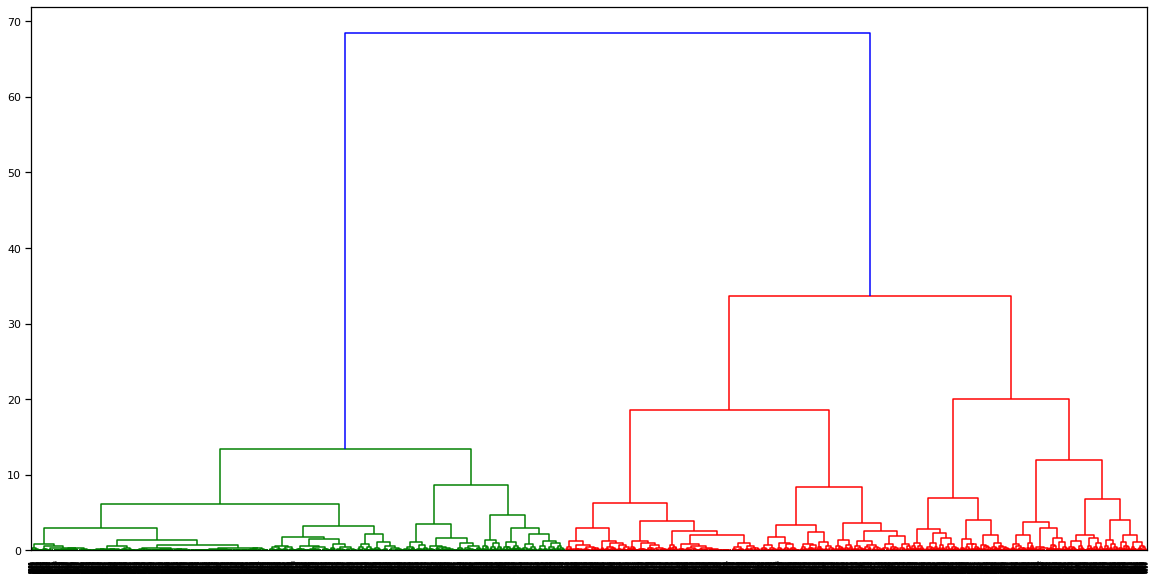

In [ ]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

# linkage ward
plt.figure(figsize = (20,10))
linkage_array = ward(pca_clusters)
dendrogram(linkage_array)
plt.show()

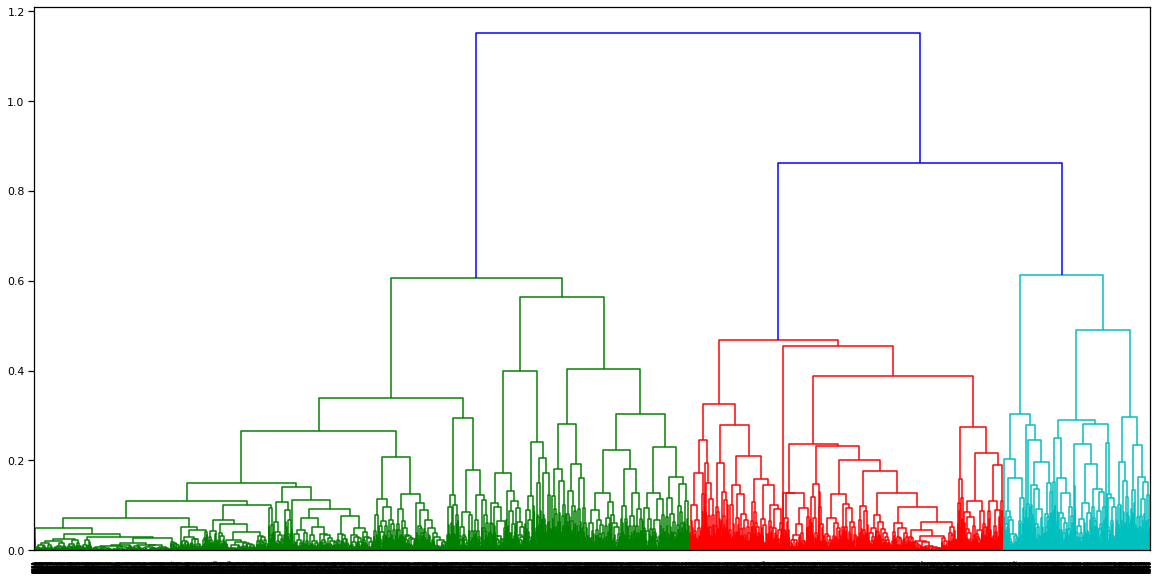

In [ ]:
# linkage average
plt.figure(figsize = (20,10))
linkage_array = average(pca_clusters)
dendrogram(linkage_array)
plt.show()

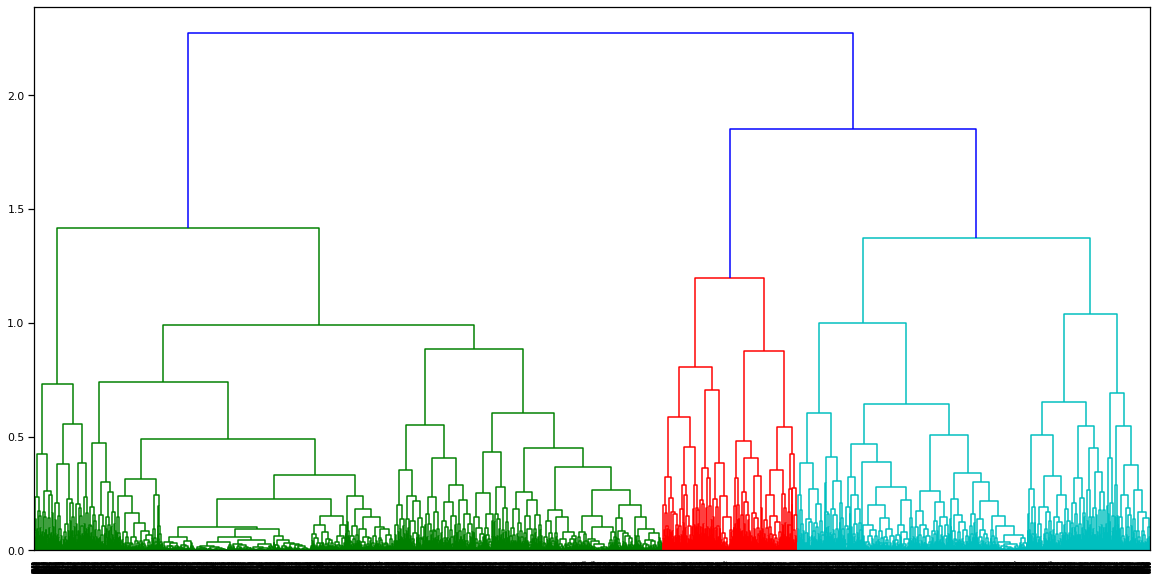

In [ ]:
# linkage complete
plt.figure(figsize = (20,10))
linkage_array = complete(pca_clusters)
dendrogram(linkage_array)
plt.show()

In [ ]:
# n_cluster yang dipilih adalah 2 karena penurunan inertia ke 3 sudah tidak signifikan
clus_ward = AgglomerativeClustering(linkage="ward", n_clusters= 2)
hasil_ward = clus_ward.fit_predict(pca_clusters)

# n_cluster yang dipilih adalah 3 karena penurunan inertia ke 4 sudah tidak signifikan
clus_average = AgglomerativeClustering(linkage="average", n_clusters= 3)
hasil_average = clus_average.fit_predict(pca_clusters)

# n_cluster yang dipilih adalah 3 karena penurunan inertia ke 4 sudah tidak signifikan
clus_complete = AgglomerativeClustering(linkage="complete", n_clusters= 3)
hasil_complete = clus_complete.fit_predict(pca_clusters)

columns = np.array(["Ward", "Average", "Complete"])
data_cluster = np.array([hasil_ward, hasil_average, hasil_complete])
for i in range(len(columns)):
  pca_clusters[columns[i]] = data_cluster[i]
pca_clusters

,PC1,PC2,Ward,Average,Complete
0,-0.482171,-0.097648,1,1,0
1,-0.608572,-0.019366,1,1,0
2,0.304511,0.920925,0,0,2
3,-0.588622,-0.005642,1,1,0
4,-0.554359,0.052989,1,1,0
...,...,...,...,...,...
8945,0.646910,-0.463139,0,2,1
8946,0.549884,-0.406737,0,2,1
8947,0.360378,-0.422724,0,2,1
8948,-0.646105,-0.204437,1,1,0


In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'PC1', 
    y = 'PC2',
    hue = 'Ward', 
    data = pca_clusters)

plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

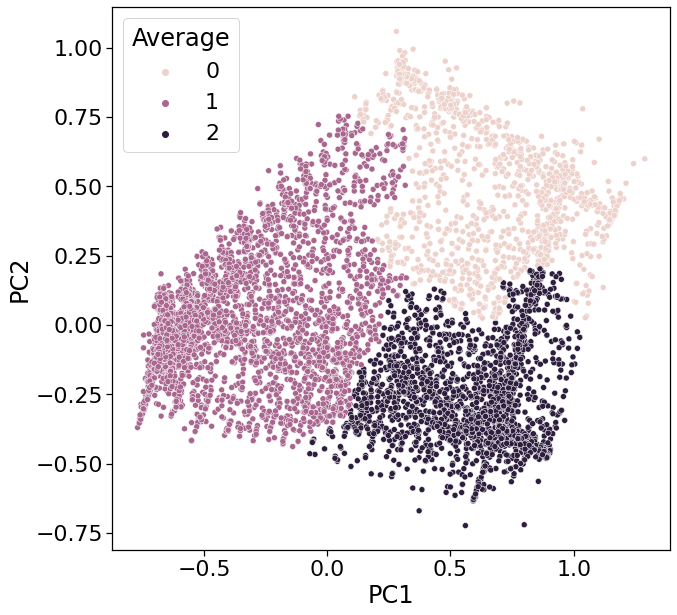

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'PC1', 
    y = 'PC2',
    hue = 'Average', 
    data = pca_clusters)

plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

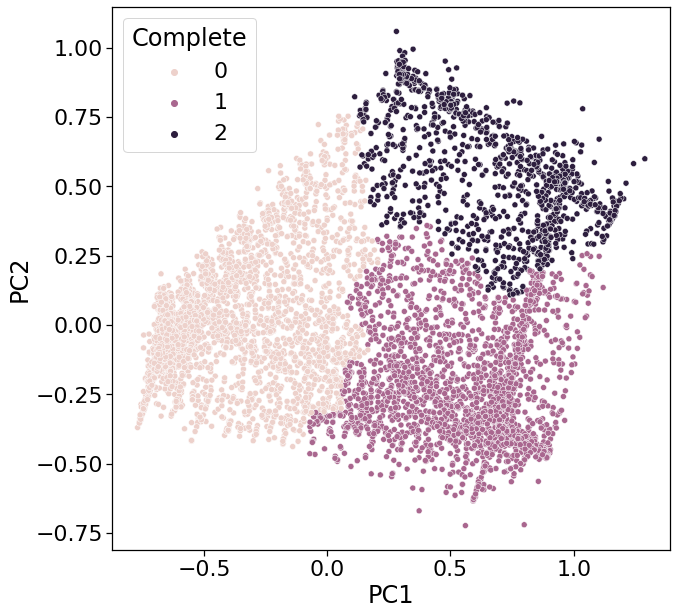

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'PC1', 
    y = 'PC2',
    hue = 'Complete', 
    data = pca_clusters)

plt.xlabel('PC1')
plt.ylabel('PC2')

Dengan melihat tabel, dapat disimpulkan bahwa modeling dengan agglomerative clustering menggunakan linkage method average dan complete menghasilkan jumlah cluster yang sama dengan modeling K-Means yaitu sebanyak 3 cluster. Namun, model utama yang dipilih adalah K-Means dikarenakan jumlah data yang terlalu banyak apabila dilakukan clustering secara hierarki melalui Agglomerative clustering.

# Conclusion

## Summary

- Missing value didefinisikan dengan logika perbankan yaitu; 1) Credit limit: 30% dari cash advance, 2) Min payments: diisi 0 jika "payments"=0, selain itu akan diisi "installment purchase" / jika 0 akan diisi "cash advance" / jika 0 akan diisi 10% dari "purchases"
- Outlier yang didefinisikan dengan IQR sangat banyak, sehingga outlier didefinisikan dengan Z-score pada threshold +/- 3
- Overall customer pada semua model memiliki kecenderungan aktif dalam pemakaian produk kartu kredit
- Pada model K-Means dengan Min Max scaling, tidak terlihat adanya fenomena pada cluster-cluster customer, cenderung normal dan tidak ada masalah
- Pada model K-Means dengan Standard scaling dan Robust scaling, hasil clustering yang terbentuk cenderung memiliki kemiripan karakteristik. Selain itu terlihat pula fenomena cluster customer yang cenderung riskan dan impactful terhadap bank. Cluster ini yaitu cluster customer dengan cash advance dan minimum payment tinggi



## Recommendation

Pada ketiga model secara umum tidak ada perbedaan yang signifikan pada hasil clustering yang terbentuk, namun clustering yang disarankan untuk segmentasi customer adalah pada model K-Means dengan standard scaling dan robust scaling.

Melalui hasil clustering tersebut, strategi marketing yang direkomendasikan antara lain:
   1. Penawaran produk installments untuk segmen customer yang potensial (cluster 0 pada model dengan standard scaling / cluster 2 pada model dengan robust scaling). Hal ini dikarenakan produk installment termasuk produk yang paling baik dalam meningkatkan revenue bank, melalui bunga dan biaya admin
   2. Penawaran produk cash advance dengan cicilan untuk segmen customer yang cenderung riskan. Hal ini bertujuan untuk mempermudah pembayaran bagi customer, pemanfaatan alokasi uang/limit yang tidak terpakai, serta dapat meningkatkan revenue bank melalui bunga atau biaya admin untuk cicilan 0%

---
---
